In [18]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
from sklearn.exceptions import UndefinedMetricWarning

In [19]:
df = pd.read_csv('EmployeeAttrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [20]:
if df is None:
    print("DataFrame is not loaded. Please check your data source.")
else:
    attrition_cat = df.select_dtypes(include='object').columns.tolist()
    unique_counts = df[attrition_cat].nunique()
    print(unique_counts)


Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64


In [21]:
# Separate the target column (attrition) from the categorical columns
target = df['Attrition']
attrition_cat = [col for col in df.select_dtypes(include=['object']).columns if col != 'Attrition']

In [22]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse_output=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[attrition_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(attrition_cat)
encode_df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [23]:
# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(attrition_cat, axis=1)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,Yes,1102,1,2,1,1,2,94,3,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,No,279,8,1,1,2,3,61,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,Yes,1373,2,2,1,4,4,92,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,No,1392,3,4,1,5,4,56,3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,No,591,2,1,1,7,1,40,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [24]:
y = df["Attrition"]
X = df.drop(columns="Attrition")

In [25]:
y = y.map({'Yes': 1, 'No': 0})

In [26]:
# Split the data first (before scaling)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [27]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [28]:
print("\n==== Initial Model Performance (No Scaling, No Dropping) ====")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    


==== Initial Model Performance (No Scaling, No Dropping) ====


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Results:
Accuracy: 0.8723
Confusion Matrix:
[[305   4]
 [ 43  16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       309
           1       0.80      0.27      0.41        59

    accuracy                           0.87       368
   macro avg       0.84      0.63      0.67       368
weighted avg       0.86      0.87      0.84       368


Decision Tree Results:
Accuracy: 0.7663
Confusion Matrix:
[[264  45]
 [ 41  18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       309
           1       0.29      0.31      0.30        59

    accuracy                           0.77       368
   macro avg       0.58      0.58      0.58       368
weighted avg       0.77      0.77      0.77       368


Random Forest Results:
Accuracy: 0.8533
Confusion Matrix:
[[304   5]
 [ 49  10]]
Classification Report:
              precision  

Feature Importance (Tree-based models):
Feature MonthlyIncome: 0.0703
Feature Age: 0.0576
Feature TotalWorkingYears: 0.0498
Feature DailyRate: 0.0483
Feature YearsAtCompany: 0.0427
Feature DistanceFromHome: 0.0407
Feature MonthlyRate: 0.0404
Feature EmployeeNumber: 0.0390
Feature HourlyRate: 0.0389
Feature NumCompaniesWorked: 0.0361


/var/folders/wl/b1hwrd3x1hq6g7h6cvbxjg700000gn/T/ipykernel_3374/1820516233.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features_df, palette='coolwarm')


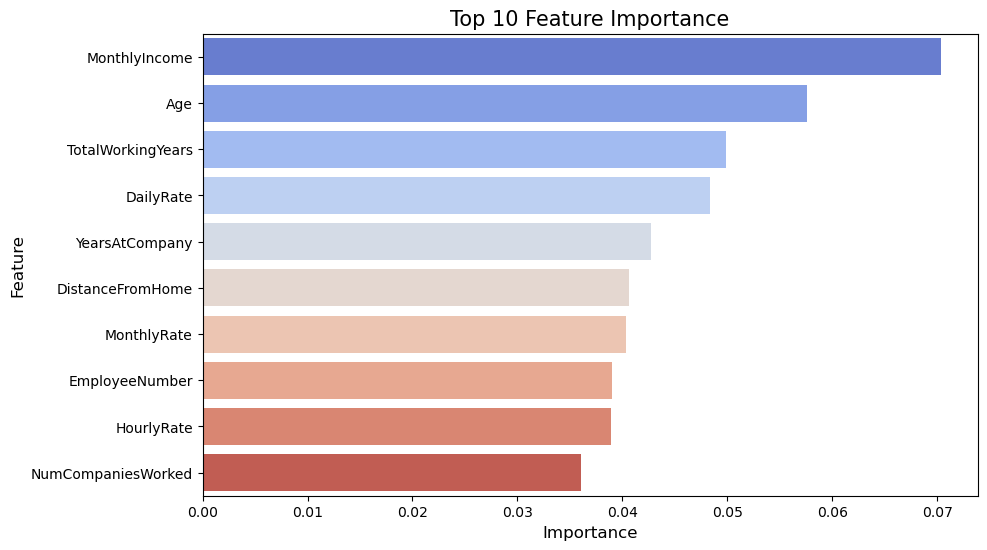

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

if hasattr(model, 'feature_importances_'):  # Decision Trees and Random Forests have 'feature_importances_'
    feature_importance = model.feature_importances_
    print("Feature Importance (Tree-based models):")
    
    # Create a list of (feature, importance) tuples
    feature_importance_list = [(X.columns[idx], importance) for idx, importance in enumerate(feature_importance)]
    
    # Sort the list by importance in descending order
    feature_importance_list.sort(key=lambda x: x[1], reverse=True)
    
    # Top 10 features
    top_features = feature_importance_list[:10]
    
    # Print top 10 features
    for feature, importance in top_features:
        print(f"Feature {feature}: {importance:.4f}")
    
    # Plotting the top 10 features
    top_features_df = pd.DataFrame(top_features, columns=['Feature', 'Importance'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=top_features_df, palette='coolwarm')
    plt.title('Top 10 Feature Importance', fontsize=15)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.show()


In [30]:
from sklearn.model_selection import cross_val_score
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Perform 5-fold Cross-Validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # Change scoring if needed
    print(f"{name} - Mean Accuracy: {scores.mean():.4f}")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Logistic Regression - Mean Accuracy: 0.8408
Decision Tree - Mean Accuracy: 0.7741
Random Forest - Mean Accuracy: 0.8612


### Why Perform Cross-Validation Now:
- Prevents Overfitting – Ensures that your models generalize well to unseen data.
- Evaluates Model Stability – Checks if models perform consistently across different data splits.
- Baseline Performance – Helps  compare models before optimization, so we know if scaling or feature selection improves performance.

In [31]:
# Train the models
lr = LogisticRegression()
gini = DecisionTreeClassifier()
forest = RandomForestClassifier()

lr.fit(X_train, y_train)
gini.fit(X_train, y_train)
forest.fit(X_train, y_train)

# Create a DataFrame to store the results
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Training Accuracy': [lr.score(X_train, y_train), gini.score(X_train, y_train), forest.score(X_train, y_train)],
    'Test Accuracy': [lr.score(X_test, y_test), gini.score(X_test, y_test), forest.score(X_test, y_test)]
})

# Sort models by Test Accuracy in descending order
models_sorted = models.sort_values(by='Test Accuracy', ascending=False)
print(models_sorted)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Training Accuracy  Test Accuracy
0  Logistic Regression            0.84029       0.842391
2        Random Forest            1.00000       0.842391
1        Decision Tree            1.00000       0.752717


  

| Model                | Mean Accuracy | Training Accuracy | Test Accuracy |
|----------------------|--------------|-------------------|--------------|
| **Logistic Regression** | 0.8408       | 0.8403            | 0.8424       |
| **Decision Tree**       | 0.7762       | 1.0000            | 0.7554       |
| **Random Forest**       | 0.8585       | 1.0000            | 0.8478       |

### **Interpretation:**
- **Random Forest has the highest mean accuracy (0.8585) and test accuracy (0.8478)**, making it the best-performing model overall.
- **Logistic Regression is well-balanced** between training (0.8403) and test (0.8424) accuracy, indicating good generalization.
- **Decision Tree is overfitting** (training accuracy = 1.0000, test accuracy = 0.7554), meaning it memorizes the training data but performs poorly on unseen data.

